In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns

In [3]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
train.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
def show_sample_images(df, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    pixel_cols = [col for col in df.columns if col != 'label']
    for i, ax in enumerate(axes):
        image = df.iloc[i][pixel_cols].values.astype(np.float32)
        image = image.reshape(28, 28)
        ax.imshow(image, cmap='gray')
        ax.axis('off')
        if 'label' in df.columns:
            ax.set_title(f"Label: {df.iloc[i]['label']}")
    plt.show()

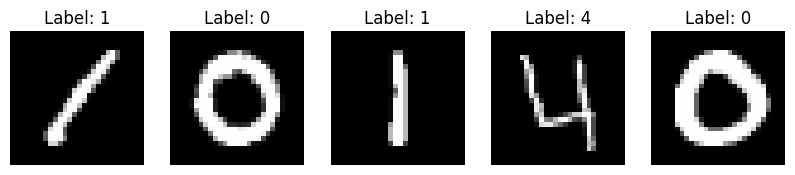

In [7]:
show_sample_images(train, num_images=5)


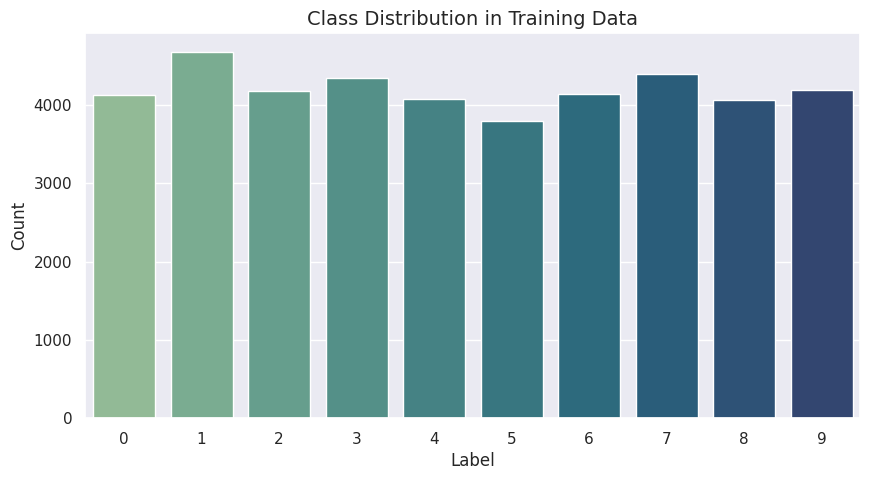

In [8]:
sns.set_theme(style="darkgrid", palette="muted")
plt.figure(figsize=(10, 5))
sns.countplot(x=train["label"], palette="crest")
plt.title("Class Distribution in Training Data", fontsize=14)
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [9]:
X = train.drop("label", axis=1).values.astype(np.float32)
y = train["label"].values

In [10]:
X = X / 255.0


In [11]:
X_test = test.values.astype(np.float32) / 255.0


In [12]:
# Convert labels to one-hot encoding (for multi-class classification)
num_classes = len(np.unique(y))
y_cat = to_categorical(y, num_classes)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y_cat, test_size=0.2, random_state=42)


In [14]:
import warnings 
warnings.filterwarnings('ignore')

In [15]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [16]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

X_train = X_train.astype('float32') / 255.0  # تطبيع القيم بين 0 و 1
X_val = X_val.astype('float32') / 255.0


In [18]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)


Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.1892 - loss: 2.1558 - val_accuracy: 0.8376 - val_loss: 0.5988
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.7474 - loss: 0.7719 - val_accuracy: 0.8910 - val_loss: 0.3636
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.8214 - loss: 0.5583 - val_accuracy: 0.9190 - val_loss: 0.2813
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.8563 - loss: 0.4629 - val_accuracy: 0.9367 - val_loss: 0.2259
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.8739 - loss: 0.4085 - val_accuracy: 0.9442 - val_loss: 0.1917
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.8943 - loss: 0.3462 - val_accuracy: 0.9512 - val_loss: 0.1652
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.8978 - loss: 0.3307 - val_accuracy: 0.9546 - val_loss: 0.1532
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.9061 - loss: 0.3021 - 

In [19]:
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

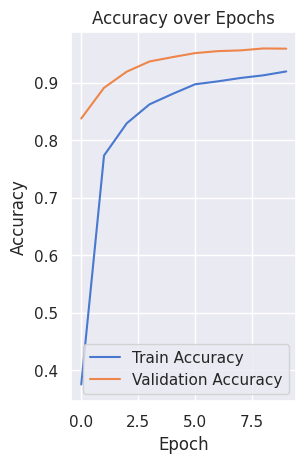

In [20]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

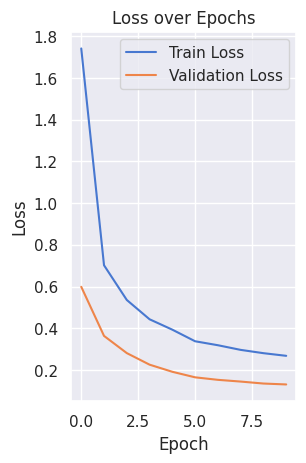

In [21]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [22]:
X_test = X_test.reshape(-1, 28, 28, 1)
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [23]:
predictions_prob = model.predict(X_test)
predictions = np.argmax(predictions_prob, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [24]:
submission_df = pd.DataFrame({
    "ImageId": np.arange(1, len(predictions) + 1),
    "Prediction": predictions
})

In [25]:
submission_df.to_csv("submissionp.csv", index=False)
print("Submission saved to submission.csv")

Submission saved to submission.csv
